In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
data = iris.data[:,:2]
data_normal = (data - data.min(axis=0))/(data.max(axis=0)- data.min(axis=0))

In [2]:
def distance(x1,x2):
    return np.sqrt(np.sum(np.power(x1-x2,2),axis=1))
def find_cluster(pt, c):
    return np.argmin(distance(c,pt))
def kmean_clustering(df, ncluster = 3, iter = 100):
    c = np.random.uniform(size=df.shape[1]*ncluster).reshape(-1,df.shape[1])
    count=0
    while count<iter:
        count +=1
        nearest_c = np.apply_along_axis(find_cluster,1,df,c)
        new_c = np.array([[df[nearest_c==i,0].mean(),df[nearest_c==i,1].mean()]  for i in range(ncluster) ])
        if (c==new_c).sum() == df.shape[0]: break
        else: c = new_c.copy()
    return nearest_c

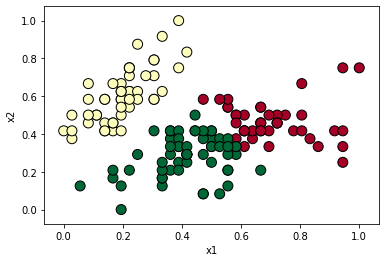

In [3]:
cluster = kmean_clustering(data_normal)
plt.scatter(data_normal[:,0], data_normal[:,1], c=cluster , cmap="RdYlGn", s=100, edgecolors="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()